In [ ]:
#| hide
# skip
! [ -e /content ] && pip install -Uqq model_inspector nbdev
# For colab. Restart the runtime after running this cell!

In [ ]:
#| default_exp inspect.regressor

# Regressor

> Inspector functionality for any regression model

In [ ]:
#| export
from typing import Optional

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.axes import Axes
from model_inspector.inspect.any_model import _Inspector

In [ ]:
#| export
class _RegInspector(_Inspector):
    def plot_pred_vs_act(
        self,
        ax: Optional[Axes] = None,
        scatter_kwargs: Optional[dict] = None,
        line_kwargs: Optional[dict] = None,
    ) -> Axes:
        """Plot predicted vs. actual values

        Parameters:
        - `ax`: Matplotlib `Axes` object. Plot will be added to this object
        if provided; otherwise a new `Axes` object will be generated.
        - `scatter_kwargs`: kwargs to pass to `plt.scatter`
        - `line_kwargs`: kwargs to pass to `plt.plot`
        """
        if ax is None:
            _, ax = plt.subplots()

        if scatter_kwargs is None:
            scatter_kwargs = {}
        scatter_kwargs = {**{"alpha": 0.3}, **scatter_kwargs}
        if "c" not in scatter_kwargs and "color" not in scatter_kwargs:
            scatter_kwargs["c"] = "k"
        y_pred = self.model.predict(self.X)
        ax.scatter(self.y, y_pred, **scatter_kwargs)

        if line_kwargs is None:
            line_kwargs = {}
        line_kwargs = {
            **{"label": "predicted=actual", "linestyle": "dashed"},
            **line_kwargs,
        }
        ax.plot(
            [self.y.min(), self.y.max()],
            [self.y.min(), self.y.max()],
            **line_kwargs,
        )

        ax.set(xlabel="Actual", ylabel="Predicted")
        ax.legend()
        return ax

    def plot_residuals(
        self,
        axes: Optional[np.array] = None,
        scatter_kwargs: Optional[dict] = None,
        line_kwargs: Optional[dict] = None,
        hist_kwargs: Optional[dict] = None,
    ) -> Axes:
        """Plot residuals

        Parameters:
        - `axes`: 1D array of two Matplotlib `Axes` objects. Plot will
        be added to these objects if provided; otherwise a new array of
        `Axes` objects will be generated.
        - `scatter_kwargs`: kwargs to pass to `plt.scatter`
        - `line_kwargs`: kwargs to pass to `plt.plot` for line at y=0
        - `hist_kwargs`: kwargs to pass to `plt.hist` for histogram of
        residuals
        """
        if axes is None:
            _, axes = plt.subplots(
                1, 2, gridspec_kw={"width_ratios": [4, 1]}, sharey=True
            )

        if scatter_kwargs is None:
            scatter_kwargs = {}
        scatter_kwargs = {**{"alpha": 0.3}, **scatter_kwargs}
        if "c" not in scatter_kwargs and "color" not in scatter_kwargs:
            scatter_kwargs["c"] = "k"
        axes[0].scatter(
            x=self.y.index, y=self.y - self.model.predict(self.X), **scatter_kwargs
        )

        if line_kwargs is None:
            line_kwargs = {}
        line_kwargs = {**{"linestyle": "dashed"}, **line_kwargs}
        axes[0].plot([self.y.index.min(), self.y.index.max()], [0, 0], **line_kwargs)
        axes[0].set(
            ylabel="actual - predicted", xlabel=self.y.index.name, title="Residuals"
        )

        if hist_kwargs is None:
            hist_kwargs = {}
        hist_kwargs = {**{"orientation": "horizontal", "color": "k"}, **hist_kwargs}
        axes[1].hist(self.y - self.model.predict(self.X), **hist_kwargs)
        return axes

In [ ]:
#| export
_all_ = ["_RegInspector"]

In [ ]:
import sklearn.datasets
from model_inspector import get_inspector
from model_inspector.inspect.regressor import _RegInspector
from sklearn.linear_model import LinearRegression

X, y = sklearn.datasets.load_diabetes(return_X_y=True, as_frame=True)
inspector = get_inspector(LinearRegression().fit(X, y), X, y)
assert isinstance(inspector, _RegInspector)

In [ ]:
inspector.methods

['permutation_importance',
 'plot_dependence',
 'plot_feature_clusters',
 'plot_permutation_importance',
 'plot_pred_vs_act',
 'plot_residuals',
 'show_correlation']

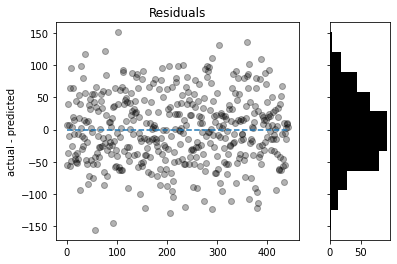

In [ ]:
axes = inspector.plot_residuals()

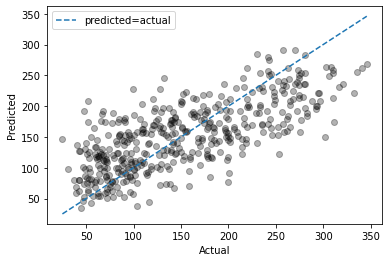

In [ ]:
ax = inspector.plot_pred_vs_act()